In [1]:
from datetime import datetime, timedelta
import requests
import os

ho: es un string y puede ser 00, 06, 12, 18 que corresponden a la hora de la corrida del modelo

In [17]:
ho = "00" # 00, 06, 12, 18

In [3]:
# Esta linea extrae las fechas actuales
current_time = datetime.now()
anio, mes, dia = current_time.strftime("%Y %m %d").split()

In [18]:
# Estas lineas corresponden a la página de donde se descargarán los datos, las variables y la región
url = "https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl?dir=%2Fgfs.{}{}{}%2F{}%2Fatmos&file=".format(anio, mes, dia, ho)
var = "&var_DPT=on&var_PRES=on&var_UGRD=on&var_VGRD=on&lev_2_m_above_ground=on&lev_975_mb=on&lev_surface=on&subregion=&toplat=5&leftlon=270&rightlon=325&bottomlat=-60"

In [19]:
file = ["gfs.t{}z.pgrb2.0p25.f{:03d}".format(ho, i) for i in range(0, 181,3)]
file2 = [url + i + var for i in file]

# El "download_folder" es la ruta donde se almacenarán los datos
download_folder = 'F:/git_hub/Miguel_Alvaro/' # modificar
download_folder_f = download_folder + current_time.strftime("%Y%m%d") + ho + "/"
os.makedirs(download_folder_f, exist_ok=True)

for numero, f in enumerate(file2):
    response = requests.get(f)
    file_name = file[numero]
    with open(download_folder_f + file_name, 'wb') as f:
        f.write(response.content)

In [21]:
import xarray as xr
ds = xr.load_dataset(download_folder_f + file[0], engine='cfgrib')

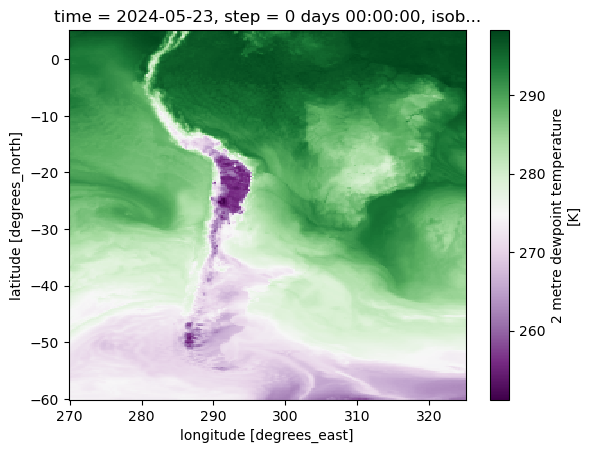

In [25]:
ds.d2m.plot(cmap = "PRGn")